In [45]:
# Библиотеки
import numpy as np
import pandas as pde
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import fastparquet

In [46]:
# Загрузка данных
logs = pd.read_parquet('logs_df_2024-08-05.parquet', engine = 'fastparquet')
data1 = pd.read_parquet('video_stat.parquet', engine = 'fastparquet')

In [47]:
# Глянуть с чем предстоит работать 

### logs 

In [48]:
logs.head(3)

,event_timestamp,user_id,region,city,video_id,watchtime
0,2024-08-05 12:12:32+03:00,bd1b6b07-e6a2-46ad-aa58-990bb7e89252,288eb079-1c29-4749-ab7e-550451a4d765,da903ff0-9eb8-4e91-b25d-22c70f962ca2,0af133e1-4fbf-4e10-b9e8-19fbe1a011c3,32
1,2024-08-05 18:30:15+03:00,7db026fc-b55c-4580-bc26-e3df59ba6c7c,f58ab76f-2581-447a-b95b-5832e8757054,8449a572-fd10-44ae-a899-af656e350ad9,4f42aab2-6238-4381-bb53-36213916e912,340
2,2024-08-05 12:35:16+03:00,5c94a654-f376-4529-b463-b62b6b50e8ca,2c1f4ce4-66e0-4481-a0ed-244bf76fa83a,93a12888-fdf4-4889-a1ef-3ef0537d674d,8b106b84-f3f5-4c27-820c-7e1546b43614,12


In [49]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32131110 entries, 0 to 34453373
Data columns (total 6 columns):
 #   Column           Dtype                    
---  ------           -----                    
 0   event_timestamp  datetime64[ns, UTC+03:00]
 1   user_id          object                   
 2   region           object                   
 3   city             object                   
 4   video_id         object                   
 5   watchtime        int64                    
dtypes: datetime64[ns, UTC+03:00](1), int64(1), object(4)
memory usage: 1.7+ GB


In [50]:
logs.shape

(32131110, 6)

### data1

In [51]:
data1.head(3)

,video_id,v_pub_datetime,v_total_comments,v_year_views,v_month_views,v_week_views,v_day_views,v_likes,v_dislikes,v_duration,...,v_category_popularity_percent_7_days,v_category_popularity_percent_30_days,v_long_views_1_days,v_long_views_7_days,v_long_views_30_days,row_number,title,description,category_id,author_id
0,973f24c0-15b2-434f-8740-4e2726f79c30,2024-06-15 22:58:03+03:00,0,556,2,0,0,0,0,7.733,...,1.656386,1.616750,0,0,0,1,пережила свой яд,,Мультфильмы,79276150-fdaf-4626-9452-6f1ad975741d
1,1a3f527c-44b2-4f7e-9641-26f078edbf2e,2021-04-18 17:27:42+03:00,0,109,2,1,0,0,0,379.000,...,5.570802,5.649635,0,0,0,1,"🎓Знаете ли Вы, что ؟ Интересные факты ! # ...","🎓Знаете ли Вы, что ? Интересные факты ! # 2🎓...",Развлечения,16278647-5912-48af-a071-582dcfd0e354
2,2f563d09-45ef-4e27-8da0-daa74235a2e7,2022-11-17 16:36:43+03:00,0,163,2,2,0,0,0,1020.767,...,0.342614,0.285310,0,0,0,1,"ЗИМНЯЯ, ТЕПЛАЯ ШЛЯПА крючком. Как связать поля...",Шляпа связана из пряжи NAKO Sport Wool в 100гр...,Хобби,9afa94aa-c2a6-43fc-a0d1-175eaf7fa194


In [52]:
data1.columns

Index(['video_id', 'v_pub_datetime', 'v_total_comments', 'v_year_views',
       'v_month_views', 'v_week_views', 'v_day_views', 'v_likes', 'v_dislikes',
       'v_duration', 'v_cr_click_like_7_days', 'v_cr_click_dislike_7_days',
       'v_cr_click_vtop_7_days', 'v_cr_click_long_view_7_days',
       'v_cr_click_comment_7_days', 'v_cr_click_like_30_days',
       'v_cr_click_dislike_30_days', 'v_cr_click_vtop_30_days',
       'v_cr_click_long_view_30_days', 'v_cr_click_comment_30_days',
       'v_cr_click_like_1_days', 'v_cr_click_dislike_1_days',
       'v_cr_click_vtop_1_days', 'v_cr_click_long_view_1_days',
       'v_cr_click_comment_1_days', 'v_is_hidden', 'v_is_deleted',
       'v_avg_watchtime_1_day', 'v_avg_watchtime_7_day',
       'v_avg_watchtime_30_day', 'v_frac_avg_watchtime_1_day_duration',
       'v_frac_avg_watchtime_7_day_duration',
       'v_frac_avg_watchtime_30_day_duration',
       'v_category_popularity_percent_7_days',
       'v_category_popularity_percent_30_days', '

In [53]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1555687 entries, 0 to 1936085
Data columns (total 43 columns):
 #   Column                                 Non-Null Count    Dtype                    
---  ------                                 --------------    -----                    
 0   video_id                               1555687 non-null  object                   
 1   v_pub_datetime                         1555687 non-null  datetime64[ns, UTC+03:00]
 2   v_total_comments                       1555687 non-null  uint64                   
 3   v_year_views                           1555687 non-null  uint64                   
 4   v_month_views                          1555687 non-null  uint64                   
 5   v_week_views                           1555687 non-null  uint64                   
 6   v_day_views                            1555687 non-null  uint64                   
 7   v_likes                                1555687 non-null  uint64                   
 8   v_disli

In [54]:
data1.shape

(1555687, 43)

### Аналитика, предоставленных датасетов 

### Дополнительная фича (по которой многим метрикам можно придать смысл)

In [55]:
# Соотношение лайков и дизлайков
data1['like_dislike_ratio'] = data1['v_likes'] / (data1['v_dislikes'] + 1)  # Добавим 1 для предотвращения деления на 0
# просчитать краевые случаи тип 1 лайк и ноль дизлайков 

### Что важно проанализировать??? 

Анализ популярности видео: Сравнение по количеству просмотров, лайкам, дизлайкам.

Анализ вовлеченности пользователей: Взаимодействие через комментарии, лайки, дизлайки.

Анализ по регионам и городам: Посмотреть, как различается поведение пользователей в разных регионах и городах.

Анализ времени с момента публикации: Определить, как влияет давность публикации видео на вовлеченность (лайки, дизлайки, время просмотра).

### Показатели для анализа
-Популярность видео (время просмотра, количество лайков, дизлайков, комментариев) 

-Вовлеченность пользователей (отношение лайков и дизлайков к просмотрам)

-Активность по регионам и городам (популярность видео по городам и регионам)

-Влияние времени с момента публикации (как время публикации влияет на вовлеченность)

In [56]:
#кол-во уникальных действий пользователей
action_counts = logs.user_id.value_counts()
action_counts

user_id
c6082ce0-f3a7-44df-a161-1d8b61730f76    91215
0a88ef77-4b93-4215-b690-a985dc8b7cd1    13452
95661e14-061d-470f-bc47-fd382c8ad84d     6695
5f7385f8-cd09-4a69-8cc3-2fad9c70eb44     5698
7833071d-e398-4ab8-a238-f1853dcf62ec     5001
                                        ...  
f454281f-947f-49ca-902a-fc2e70345079        1
d1c50d52-c76f-4f32-8d46-954016a3718f        1
0ec6d359-1cdb-49e0-b342-5c7c6f9c4c45        1
172660f1-0a77-4078-84c4-d3e2bcc6f1ab        1
bfd7b5c7-8da6-4149-9773-69fbd9cfc76a        1
Name: count, Length: 10083777, dtype: int64

In [57]:
np.mean(action_counts) # в среднем на одного пользователя видим, что имеется большое колво тех, кто быстро ливнул после одного просмотра

3.1864161613252655

In [59]:
## Отбор пользователей, которые сделали менее 10 действий
user_action_counts = logs.groupby('user_id').size().reset_index(name='action_count')
users_with_few_actions = user_action_counts[user_action_counts['action_count'] < 10]
logs_few_actions = logs[logs['user_id'].isin(users_with_few_actions['user_id'])]

print(f"Число пользователей, совершивших менее 10 действий: {len(users_with_few_actions)}")
display(logs_few_actions.head())

Число пользователей, совершивших менее 10 действий: 9492272


,event_timestamp,user_id,region,city,video_id,watchtime
2,2024-08-05 12:35:16+03:00,5c94a654-f376-4529-b463-b62b6b50e8ca,2c1f4ce4-66e0-4481-a0ed-244bf76fa83a,93a12888-fdf4-4889-a1ef-3ef0537d674d,8b106b84-f3f5-4c27-820c-7e1546b43614,12
3,2024-08-05 20:48:51+03:00,b972399a-c4b9-47fe-88fa-ccb1827cd131,f28a922a-68b9-46ce-8b52-c0be09413514,a269faea-d63c-4196-9963-00c62b5b3264,305389f3-1c8d-4026-9eef-e2b875a35380,2460
6,2024-08-05 20:59:13+03:00,a3bfdb54-7a46-4525-bdbe-96945903829c,63b24d98-c702-4aae-a333-4d2ea938c5f9,9c420a6d-ad0d-405f-af20-8ffeebb6fe97,bc48c5f6-6b7c-413e-9337-c453c32a5a8b,20
7,2024-08-05 22:13:13+03:00,964fc873-4cb9-4c13-bd49-19dc45833009,5866fc73-81ee-4b67-be73-fbc410d51508,1fc6358a-f46b-4174-913d-982ca8a45079,74bcba6c-1941-46d5-81cc-da3d8c1f59e4,486
9,2024-08-05 13:16:02+03:00,c305de89-1e09-4adf-ba77-03646c294036,8b8aef48-5759-4d5b-b20a-3104bb40f258,e3d14406-3001-452b-b2a2-4151741923e6,e34b4ee3-64f4-43b4-95fb-3ddd8b4d18d4,6330


In [60]:
top_categories = data1['category_id'].value_counts()
print('колво категорий', len(top_categories))
top_categories10 = top_categories[:10]
top_categories10

колво категорий 40


category_id
Разное          479295
Сериалы          96044
Телепередачи     94876
Видеоигры        86695
Музыка           77682
Развлечения      77179
Фильмы           60323
Лайфстайл        50436
Детям            48468
Обучение         48440
Name: count, dtype: int64

In [61]:
data_view_react = data1[['v_total_comments', 'v_year_views', 'v_month_views', 'v_week_views', 'v_day_views', 'v_likes', 'v_dislikes', 'category_id']]
category_comments = data_view_react.groupby('category_id').agg({'v_total_comments' : 'sum', 'v_year_views' : 'sum'})
print(category_comments.head(5))
category_comments.reset_index(drop=False, names='category', inplace=True)
category_comments.sort_values(by='v_year_views', ascending=False, inplace = True)
category_comments.head(5)

             v_total_comments  v_year_views
category_id                                
UNKNOWN                 18321      12242572
Авто-мото               35240      68045617
Аниме                    9178      41329910
Аудио                    2523       2271345
Аудиокниги               4555       8214863


,category,v_total_comments,v_year_views
33,Телепередачи,2510485,1315424901
27,Развлечения,236109,528490046
30,Сериалы,89771,437878810
28,Разное,128290,342165585
22,Обучение,150346,311039792


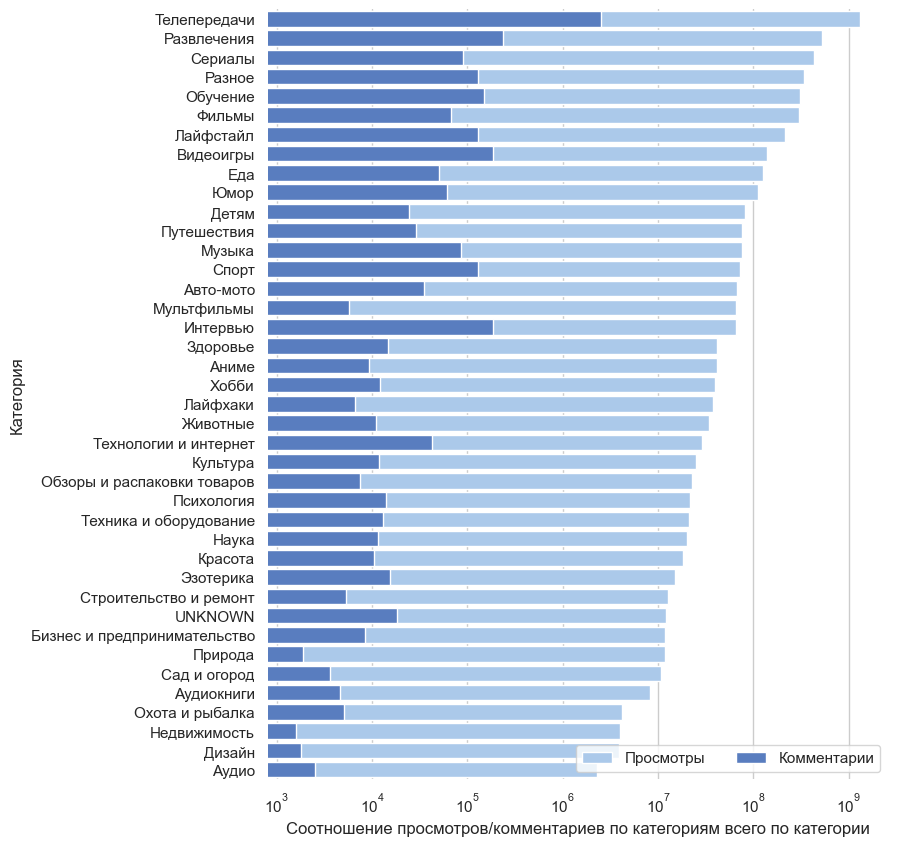

In [62]:
sns.set_theme(style="whitegrid")

f, ax = plt.subplots(figsize=(8, 10))

sns.set_color_codes("pastel")
sns.barplot(x="v_year_views", y="category", data=category_comments,
            label="Просмотры", color="b")

sns.set_color_codes("muted")
sns.barplot(x="v_total_comments", y="category", data=category_comments,
            label="Комментарии", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xscale = 'log', ylabel="Категория",
       xlabel="Соотношение просмотров/комментариев по категориям всего по категории")
sns.despine(left=True, bottom=True)

In [63]:
category_likes = data_view_react.groupby('category_id').agg({'v_likes' : 'mean', 'v_year_views' : 'mean'})
print(category_likes.head(5))
category_likes.reset_index(drop=False, names='category', inplace=True)
category_likes.sort_values(by='v_year_views', ascending=False, inplace = True)
category_likes.head(5)

               v_likes  v_year_views
category_id                         
UNKNOWN      22.014432   1185.836110
Авто-мото     5.914885   1687.555602
Аниме        13.025973   3903.467133
Аудио         2.698385    780.262796
Аудиокниги    3.713770   1185.748124


,category,v_likes,v_year_views
33,Телепередачи,18.177168,13864.674955
27,Развлечения,25.715182,6847.588670
22,Обучение,14.297069,6421.135260
36,Фильмы,9.658505,4965.527858
30,Сериалы,9.651920,4559.147995


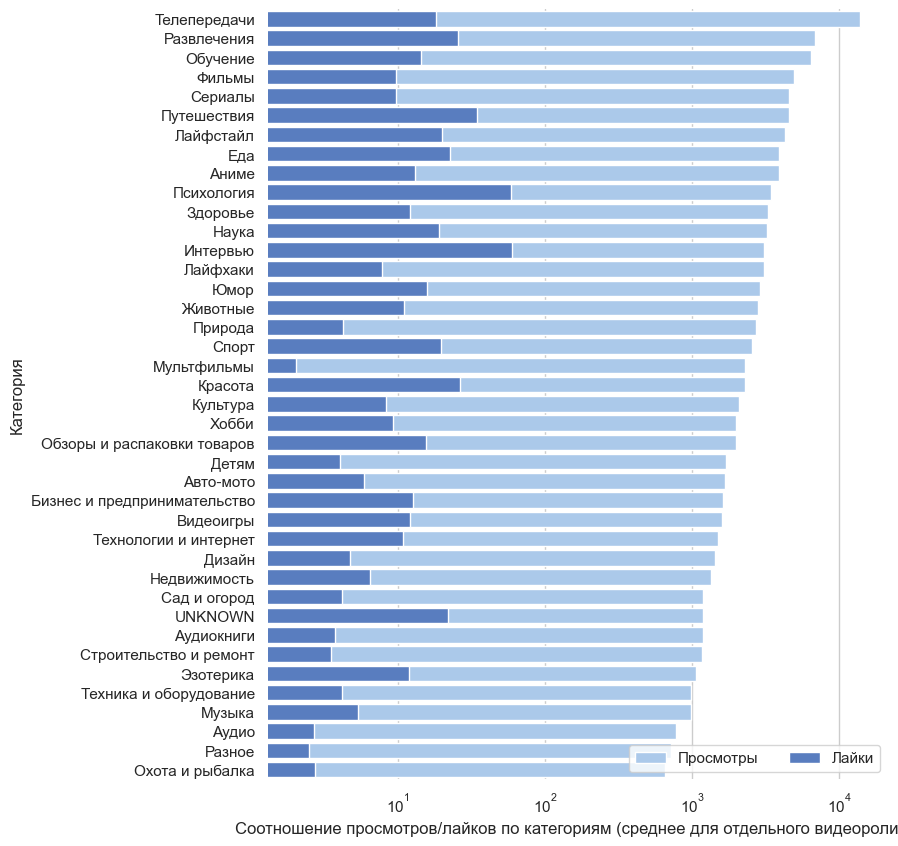

In [64]:
sns.set_theme(style="whitegrid")

f, ax = plt.subplots(figsize=(8, 10))

sns.set_color_codes("pastel")
sns.barplot(x="v_year_views", y="category", data=category_likes,
            label="Просмотры", color="b")

sns.set_color_codes("muted")
sns.barplot(x="v_likes", y="category", data=category_likes,
            label="Лайки", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xscale = 'log', ylabel="Категория",
       xlabel="Соотношение просмотров/лайков по категориям (среднее для отдельного видеоролика)")
sns.despine(left=True, bottom=True)

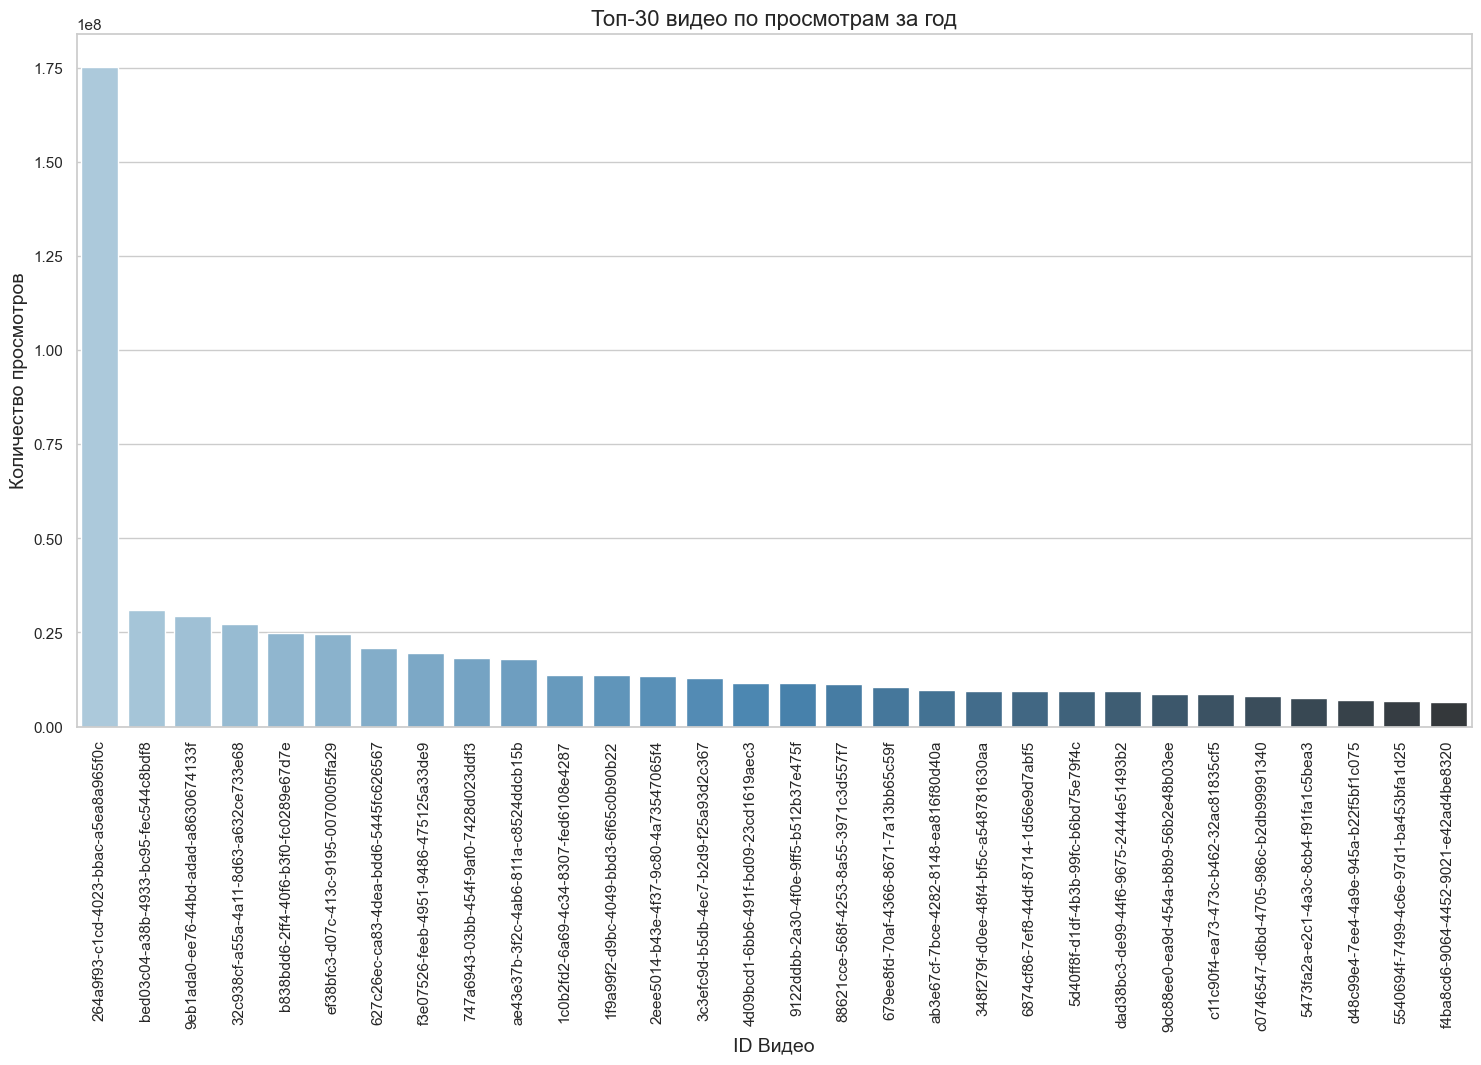

In [65]:
# 1
video_popularity = data1[['video_id', 'v_year_views', 'v_month_views', 'v_week_views', 'v_likes', 'v_dislikes', 'v_total_comments']]
top_30_videos = video_popularity.sort_values(by='v_year_views', ascending=False).head(30)

plt.figure(figsize=(18, 9))
sns.barplot(x='video_id', y='v_year_views', data=top_30_videos, palette='Blues_d')
plt.title('Топ-30 видео по просмотрам за год', fontsize=16)
plt.xlabel('ID Видео', fontsize=14)
plt.ylabel('Количество просмотров', fontsize=14)
plt.xticks(rotation=90)
plt.show()


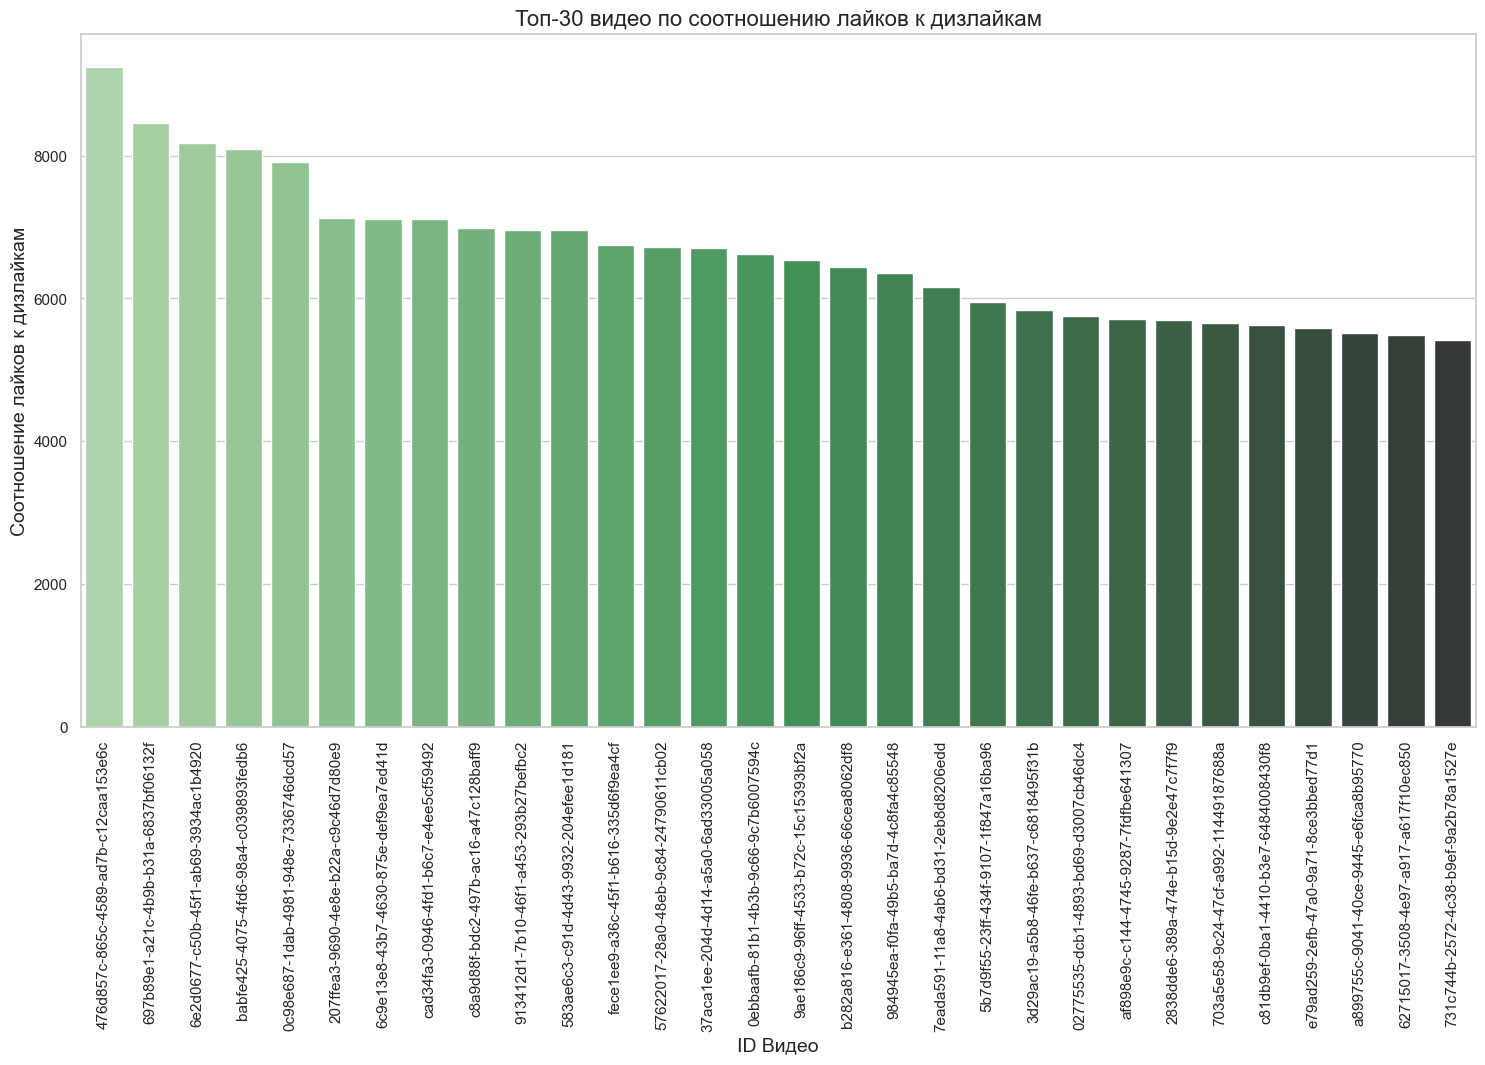

In [66]:
#2 (юзнули фичу новую)
# Добавим столбец с соотношением лайков к дизлайкам
data1['like_dislike_ratio'] = data1['v_likes'] / (data1['v_dislikes'] + 1)  # чтобы избежать деления на 0

top_30_engagement = data1.sort_values(by='like_dislike_ratio', ascending=False).head(30)

plt.figure(figsize=(18, 9))
sns.barplot(x='video_id', y='like_dislike_ratio', data=top_30_engagement, palette='Greens_d')
plt.title('Топ-30 видео по соотношению лайков к дизлайкам', fontsize=16)
plt.xlabel('ID Видео', fontsize=14)
plt.ylabel('Соотношение лайков к дизлайкам', fontsize=14)
plt.xticks(rotation=90)
plt.show()


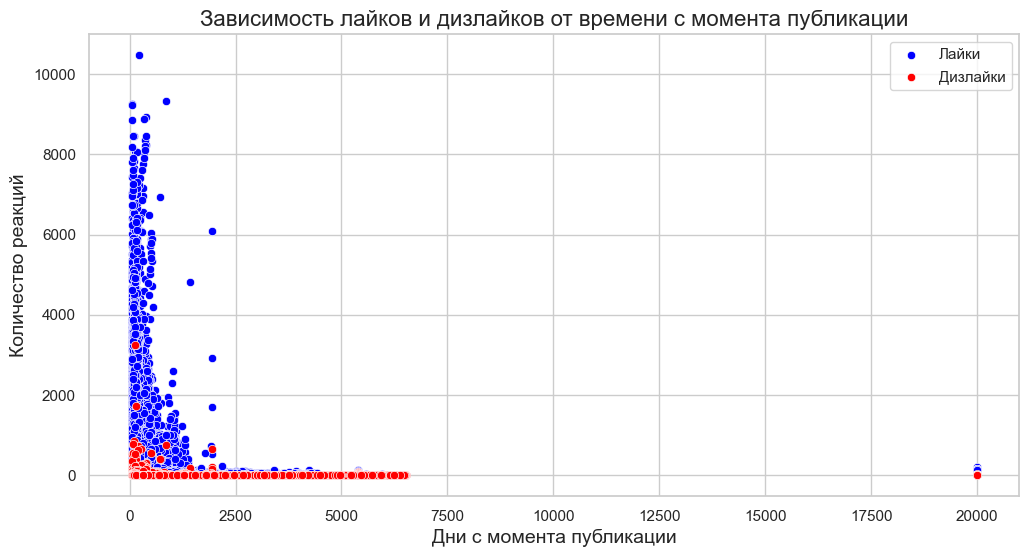

In [67]:
#4 
from datetime import datetime
data1['v_pub_datetime'] = pd.to_datetime(data1['v_pub_datetime']).dt.tz_localize(None)  # Убираем временную зону
current_time = pd.to_datetime(datetime.now())  # Получаем текущее время

# Добавление столбца с количеством дней с момента публикации
data1['days_since_pub'] = (current_time - data1['v_pub_datetime']).dt.days

plt.figure(figsize=(12, 6))
sns.scatterplot(x='days_since_pub', y='v_likes', data=data1, label='Лайки', color='blue')
sns.scatterplot(x='days_since_pub', y='v_dislikes', data=data1, label='Дизлайки', color='red')
plt.title('Зависимость лайков и дизлайков от времени с момента публикации', fontsize=16)
plt.xlabel('Дни с момента публикации', fontsize=14)
plt.ylabel('Количество реакций', fontsize=14)
plt.legend()
plt.show()


### Зависимости 

/Volumes/MacMedia_MY/Anaconda/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


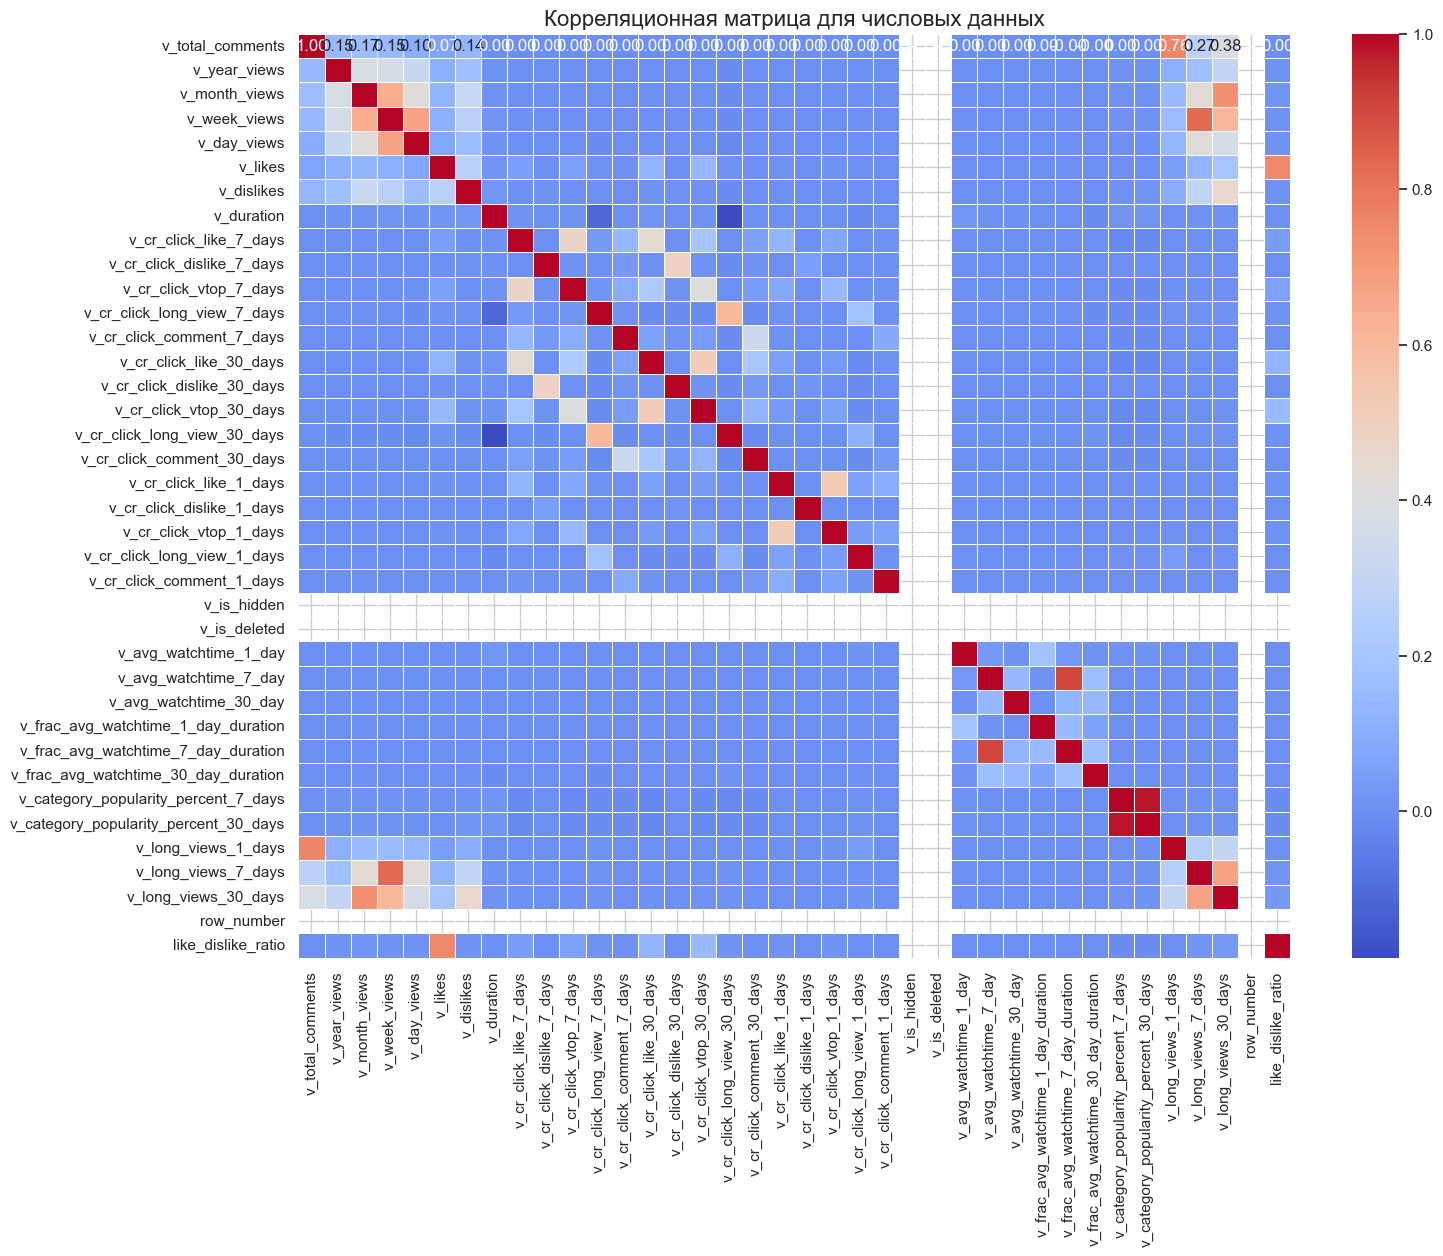

In [68]:
# Выбираем числовые столбцы
numeric_columns = data1.select_dtypes(include=['float64', 'uint64', 'uint8'])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Корреляционная матрица для числовых данных', fontsize=16)
plt.show()


### топ зависимостей 

In [69]:
# Рассчитываем корреляционную матрицу
correlation_matrix = numeric_columns.corr()
correlation_matrix = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
correlation_pairs = correlation_matrix.stack().reset_index()
correlation_pairs.columns = ['Фича_раз', 'Фича_два', 'Correlation']
correlation_pairs['Absolute Correlation'] = correlation_pairs['Correlation'].abs()

top_correlations = correlation_pairs.sort_values(by='Absolute Correlation', ascending=False)

top_10_correlations = top_correlations.head(10)
display(top_10_correlations)


,Фича_раз,Фича_два,Correlation,Absolute Correlation
580,v_category_popularity_percent_7_days,v_category_popularity_percent_30_days,0.981202,0.981202
542,v_avg_watchtime_7_day,v_frac_avg_watchtime_7_day_duration,0.906478,0.906478
127,v_week_views,v_long_views_7_days,0.825355,0.825355
30,v_total_comments,v_long_views_1_days,0.758090,0.758090
188,v_likes,like_dislike_ratio,0.749999,0.749999
97,v_month_views,v_long_views_30_days,0.727611,0.727611
592,v_long_views_7_days,v_long_views_30_days,0.676657,0.676657
99,v_week_views,v_day_views,0.671831,0.671831
67,v_month_views,v_week_views,0.640074,0.640074
128,v_week_views,v_long_views_30_days,0.608433,0.608433
